# HUDM5199 - Spring 2022 - Final
### 5/4/22 Wednesday 6:30pmET - 8:10pmET (total 100 minutes)
### Total 4 Questions - 100 Points
- Follow the instructions (5 points)
- Q1 (14 points)
- Q2 (10 points)
- Q3 (27 points)
- Q4 (34 points)

### Please make sure you execute all the code before you submit the final exam. 
### Please keep a clear format and submit your final as "YourFullName_Final" Jupyter Notebook file.
### Please use markdown or comments syntax for any non-code explanation.
### Feel free to add more cells if you feel needed for any questions.

### Please put your name and UNI below:

Name: Tarun Agrawal

UNI: ta2629

## (Total 14 points) Q1. Define a function:

#### (Hint: Midterm Question 1 Function 3)

Step 1. The required argument for this function is a list. The default argument (or we call default parameter value) is [10, 20, 30, 40]. (Assume people will not use an empty list or an one-element list as arguments.)

Step 2. The function asks users to enter either "sum" or "skip". Your function should handle the situation that:
1. Users leave unnecessary whitespace when they type 
2. Users use either uppercase letter or lowercase letter or the combination.

Step 3. 
- If users type "sum", you will sum all numbers in your argument list and output the result. 
- If users type "skip", you will sum the numbers in your argument list but **skip any number larger than 20** if the number is in your argument list and output the result. 
- If users type anything else different from "sum" or "skip", you will end the function and let them know they enter something wrong.

Step 4. Test your function with the default argument.

Step 5. Test your function with a call different from the default argument.

In [95]:
import matplotlib
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pandas as pd
import re
import time as tt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from itertools import combinations
import calendar 
from itertools import chain
import math

In [44]:
def sum_skip(list_name = [10, 20, 30, 40]):

    operation_type = str(input('Enter sum or skip: '))
    operation_type = operation_type.lower()
    operation_type = operation_type.replace(" ", "")
    
    if(operation_type == 'sum'):
        output = sum(list_name)
    
    elif(operation_type == 'skip'):
        final_list = [i for i in list_name if i <= 20]
        output = sum(final_list)
        
    else:
        output = "Incorrect operation type entered"
        
    return output

# Testing with default argument:
print(sum_skip())

# Testing with a different argument:
different_list = [10, 11, 19, 20, 30, 40, 10, 19]
print(sum_skip(different_list))

Enter sum or skip:  sum


100


Enter sum or skip:  sum


159


## (Total 10 points) Q2. Create numpy arrays and pandas dataframes using the approaches we learned in class:

Step 1. Create a 6 by 8 dimensions numpy array (array1) with elements 1,5,9,13...until but not including 190 (incrementing by 4) in an **ascending** order using the array methods we learned in class.

Step 2. Create an one dimensional numpy array (array2) to include only the last 8 elements in array1 using indexing or slicing and the methods we learned in class.

Step 3. Create another numpy array (array3) which is the product of array1 and array2. Explain why we can conduct such an arithmetic operation in this condition.

Step 4. Create an 8 by 6 pandas DataFrame (df1) based on the **transposed** array3.

Step 5. Create a subset DataFrame (df2) based on the second to fourth columns and the first and the third rows of df1 using the attributes we learned in class.

In [29]:
# Importing the Numpy, and pandas Library:
import numpy as np
import pandas as pd

# Step 1:
array1 = np.arange(1, 190, 4).reshape(6, 8)
array1

# Step 2:
array2 = array1[-1]
array2

# Step 3:
array3 = array1 * array2
array3
# We are able to conduct this operation because the size of each row of array1 is a multiple of size of array2, that is 8.

# Step 4:
df1 = pd.DataFrame(array3.T)
df1
    
# Step 5:
df2 = df1.iloc[[0,2], 1:4]
df2

,1,2,3
0,5313,10465,15617
2,6929,12337,17745


## (Total 27 points) Q3. Import all the sheets from the excel file "TC_flight_ratings" into Python dataframes and write Python code to answer the following questions:

1. (1) Load all three excel sheets from "TC_flight_ratings" excel file provided into three different Python dataframes called "df_ratings", "df_profile" and "df_class" accordingly. (2) In each of the first two dataframes, is each id unique? How do you know?

#### Hint: Session 9 Slides Page 35 in Canvas

In [70]:
# (1)

# Reading the ratings sheet:
df_ratings = pd.read_excel('/Users/tarunagrawal/Downloads/TC_flight_ratings.xlsx', sheet_name = 'ratings', index_col = None, na_values = ['NA']) 

# Reading the profile sheet:
df_profile = pd.read_excel('/Users/tarunagrawal/Downloads/TC_flight_ratings.xlsx', sheet_name = 'profile', index_col = None, na_values = ['NA'])

# Reading the class sheet:
df_class = pd.read_excel('/Users/tarunagrawal/Downloads/TC_flight_ratings.xlsx', sheet_name = 'class', index_col = None, na_values = ['NA']) 

# (2)

# Method 1:
print(df_ratings.id.size)
print(df_ratings.id.unique().size)
# Since the length of id column is same as thee length of unique values in the id column, we can conclude that id's are unique in df_ratings.

print(df_profile.id.size)
print(df_profile.id.unique().size)
# Since the length of id column is same as thee length of unique values in the id column, we can conclude that id's are unique in df_profile.

# Method 2:
print(sum(df_ratings.id != df_ratings.id.unique()))
# 0 shows that all id's are same.

print(sum(df_profile.id != df_profile.id.unique()))
# # 0 shows that all id's are same.



3153
3153
3552
3552
0
0


2. Use appropriate join methods we learned from the course to aggregate all the three dataframes into **one** appropriate dataframe called "df_all" **without creating any new missing value**. Explain why you use the methods (one method per sentence). How many rows and columns we have for the df_all dataframe?

In [73]:
df_1 = df_ratings.merge(df_profile, how = 'inner', on = ['id']) # An inner join has been used on id as it was the common column in two dataframes. It has been assumed that the id column in both dataframes represent customer id. Inner join is implemented to not generate null values for non existing id's in df_ratings. 
df_all = df_1.merge(df_class, how = 'inner', on = ['Class']) # An inner join on class variable has been done joining the df_class with the merged dataset in previous line.
df_all.head(10)

,id,Inflight wifi service rating,DepartureArrival time convenient rating,Ease of Online booking,Gate location rating,Food and drink rating,Online boarding rating,Seat comfort rating,Inflight entertainment rating,Onboard service rating,...,Checkin service rating,Inflight service rating,Cleanliness rating,Overall satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Class_Level
0,1050,5,5,5.0,5.0,1.0,2.0,3.0,5.0,5.0,...,4,5.0,2,satisfied,Female,Loyal Customer,69,Business travel,2,Eco
1,2463,3,4,4.0,4.0,3.0,3.0,3.0,3.0,2.0,...,4,4.0,3,neutral or dissatisfied,Female,Loyal Customer,40,Business travel,2,Eco
2,2980,2,4,2.0,3.0,2.0,2.0,2.0,2.0,3.0,...,2,1.0,2,neutral or dissatisfied,Male,Loyal Customer,12,Personal Travel,2,Eco
3,1150,3,5,3.0,4.0,5.0,3.0,1.0,5.0,5.0,...,3,5.0,5,neutral or dissatisfied,Female,Loyal Customer,15,Personal Travel,2,Eco
4,2201,4,4,4.0,5.0,4.0,4.0,4.0,4.0,3.0,...,5,4.0,4,satisfied,Male,Loyal Customer,52,Personal Travel,2,Eco
5,2902,1,3,1.0,3.0,5.0,1.0,5.0,5.0,3.0,...,5,1.0,5,neutral or dissatisfied,Male,Loyal Customer,60,Personal Travel,2,Eco
6,2671,4,4,4.0,2.0,2.0,4.0,2.0,2.0,5.0,...,4,4.0,2,neutral or dissatisfied,Female,Loyal Customer,8,Personal Travel,2,Eco
7,1600,3,3,3.0,4.0,4.0,3.0,4.0,4.0,4.0,...,1,4.0,4,neutral or dissatisfied,Female,Loyal Customer,25,Personal Travel,2,Eco
8,217,2,5,2.0,1.0,5.0,2.0,5.0,5.0,4.0,...,4,4.0,5,neutral or dissatisfied,Male,Loyal Customer,48,Personal Travel,2,Eco
9,1016,1,1,1.0,1.0,4.0,1.0,4.0,4.0,4.0,...,2,2.0,4,neutral or dissatisfied,Female,disloyal Customer,47,Business travel,2,Eco


3. In **df_profile** dataframe:
    - (1) Create a new column called "age_category" based on "Age" variable using **apply method and lambda function**. If age is larger than 65 or smaller than 18, age_category is "discount", otherwise age_category is "adult".
    - (2) How many categories are in "Type of Travel" and how many observations are in each category?
    - (3) Build a contingency table to show the number of observations who are disloyal customer and loyal customer by gender. Build an appropriate plot to show the information from the contingency table. Describe the information shown by the plot.
    - (4) How many observations are Class 1 and also older than 20 years old?

In [84]:
# (1)
df_profile['age_category'] = df_profile.apply(lambda x: 'discount' if (df_profile['Age'] > 65 | df_profile['Age'] < 18) else 'adult')
df_profile.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

4. Check the missing values in **df_ratings** dataframe:
    - (1) Which columns have missing values?
    - (2) How many observations contain at least one missing value?
    - (3) Use one of the methods to deal with the observations that contain at least one missing value

In [123]:
df_ratings.isnull().sum()
# the columns: 'Ease of Online booking','Gate location rating', 'Food and drink rating', 'Online boarding rating', 'Seat comfort rating','Inflight entertainment rating', 'Onboard service rating','Leg room service rating', 'Baggage handling rating','Inflight service rating', 
# have missin gvlaues.

print(df_ratings.isnull().sum(axis =1))

# Filling missing values with 0:
df_ratings.fillna(0)

0       0
1       0
2       0
3       0
4       0
       ..
3148    0
3149    0
3150    0
3151    0
3152    0
Length: 3153, dtype: int64


,id,Inflight wifi service rating,DepartureArrival time convenient rating,Ease of Online booking,Gate location rating,Food and drink rating,Online boarding rating,Seat comfort rating,Inflight entertainment rating,Onboard service rating,Leg room service rating,Baggage handling rating,Checkin service rating,Inflight service rating,Cleanliness rating,Overall satisfaction
0,1050,5,5,5.0,5.0,1.0,2.0,3.0,5.0,5.0,5.0,5.0,4,5.0,2,satisfied
1,775,3,1,1.0,1.0,5.0,3.0,2.0,3.0,3.0,3.0,3.0,3,3.0,4,neutral or dissatisfied
2,2463,3,4,4.0,4.0,3.0,3.0,3.0,3.0,2.0,5.0,4.0,4,4.0,3,neutral or dissatisfied
3,2980,2,4,2.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,2,1.0,2,neutral or dissatisfied
4,146,4,4,4.0,4.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,3,4.0,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,1821,2,1,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,3.0,2,4.0,2,neutral or dissatisfied
3149,1835,3,2,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,1,1.0,2,neutral or dissatisfied
3150,1024,3,1,1.0,1.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,neutral or dissatisfied
3151,3047,2,5,2.0,2.0,5.0,4.0,1.0,3.0,3.0,2.0,3.0,5,3.0,2,neutral or dissatisfied


5. Based on **df_ratings** after you deal with the missing values in 4 above, we want to build a predictive model:
    - (1) Which variable you think should be the target variable? Which variables you should choose as independent variables/features/predictors? Why?
    - (2) Which type of model are you trying to build (classification, regression or clustering)? 
    - (3) Please transform the variable "Overall satisfaction" into appropriate data type and build two different models to do training and testing.
    - (4) Compare the metrics between these two models and make the conclusion which model is better and why this model is better?

## (Total 34 points) Q4. Load the csv file "TC_weather_bike_rent" into a Python dataframe and write Python code to answer the following questions:

1. Load the csv file "TC_weather_bike_rent" into a Python dataframe.

In [91]:
main_df = pd.read_csv('/Users/tarunagrawal/Downloads/TC_weather_bike_rent.csv')

2. Create a heatmap to show the correlation values between each two numeric or cetegorical variables in the dataframe. Then identify and describe the relationship of any two pairs of variables, of your choice, based on the value of the correlation in the heatmap.

<AxesSubplot:>

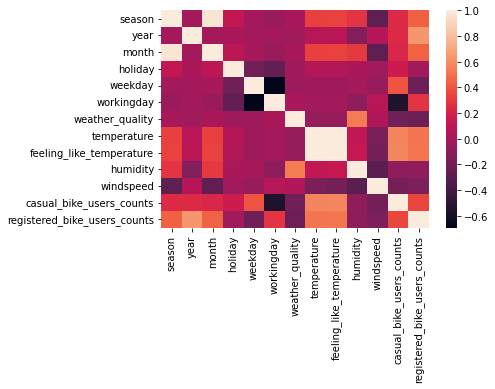

In [96]:
import seaborn as sns
all_corr_df = main_df.corr()
sns.heatmap(main_df.corr())
# Month and season have a very high correlation of 0.97. This is expected since seasons are comprised of months.

3. Create a pivot table to show the **total** number of casual bike users and registered bike users by weather quality and weekday. Then describe two findings you can get from the table.

In [98]:
table = pd.pivot_table(main_df, index= ['weather_quality', 'weekday'], values=['casual_bike_users_counts', 'registered_bike_users_counts'], aggfunc= 'sum')
flat = pd.DataFrame(table.to_records())
flat = flat.fillna(0)
print(flat)

#Finding 1 - Weather Quality  =1 has the highest number of casual and registreted bike users whether weather quality 3 has the lower number of casual and registreted bike users
#Finding 2 - For all the 3 weather qualities, the number of casual and registreted bike users have a somewhat decreasing trend as the days pass (from 1 to 7)

    weather_quality  weekday  casual_bike_users_counts  \
0                 1        1                     18306   
1                 1        2                     13610   
2                 1        3                     16453   
3                 1        4                     17736   
4                 1        5                     20608   
5                 1        6                     42302   
6                 1        7                     39730   
7                 2        1                     12894   
8                 2        2                      7735   
9                 2        3                      5094   
10                2        4                      4743   
11                2        5                      7825   
12                2        6                     18042   
13                2        7                     16681   
14                3        2                       645   
15                3        3                       385   
16            

4. (1) Create a new column called "total_bike_users" in the dataframe which is the sum of column "" and column "". (2) Use one of the methods we learned in class to create a table showing the **average** of "total_bike_users" distributed by month. (3) Based on (2), create a line plot with green line and a triangle marker to show the average . Give the plot an appropriate title as well as x and y labels. Then describe what you see from the plot.

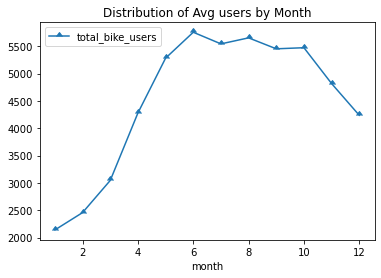

In [99]:
main_df['total_bike_users'] = main_df['casual_bike_users_counts'] + main_df['registered_bike_users_counts'] # Question wrong hence used the columns that made most sense.

avg_bike_users = main_df.groupby(['month'],as_index=False)['total_bike_users'].agg('mean')

lines = avg_bike_users.plot.line(x = 'month', y = 'total_bike_users', marker=10, title ='Distribution of Avg users by Month')

# The average user count increases sharply from January to June, stabilizes till October and starts falling from November

5. Use **plotly** library to create a plot of your choice (such as scatter plot, bar plot, pie or line plot and so on) between at least one categorical variable and at least one numeric variable you select in the dataset. Please desrcibe what you see from the plot.

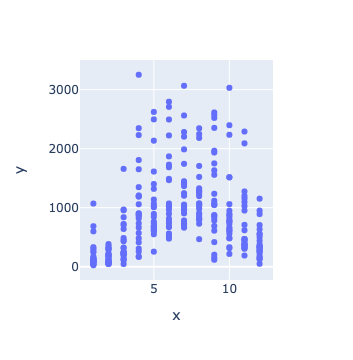

In [118]:
import plotly.express as px
fig = px.scatter(x = main_df["month"], y = main_df["casual_bike_users_counts"])
fig.show()

6. Please build a clustering model, use the K-Means Elbow Technique to determine the optimal number of clusters, based on the variables of your choice. Explain how you choose the number of clusters.

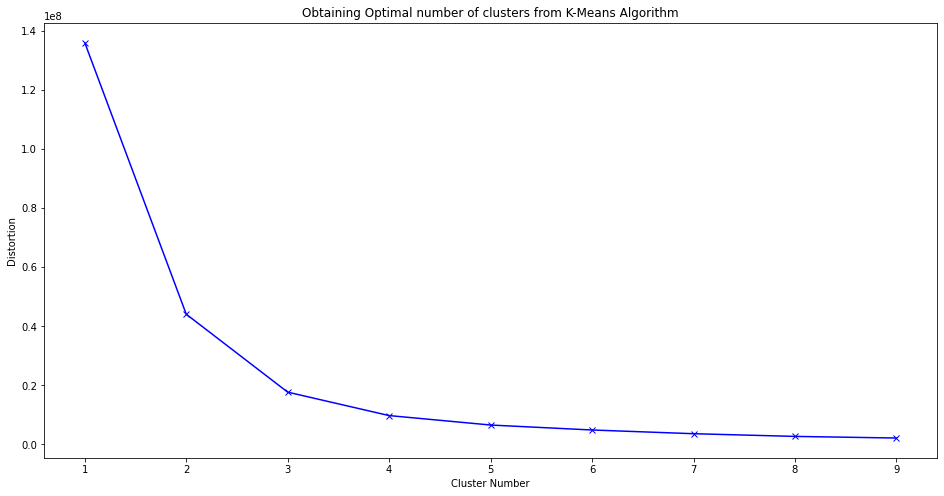

In [104]:
from sklearn.cluster import KMeans

clustering_df = main_df[["temperature", "humidity", "windspeed", "casual_bike_users_counts"]]

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clustering_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cluster Number')
plt.ylabel('Distortion')
plt.title('Obtaining Optimal number of clusters from K-Means Algorithm')
plt.show()

#The graph is tapering off from Cluster 3. Therefore, I would choose 3 clusters with this dataframe. 

7. Then build a clustering model using the number of clusters you choose to train the data we have. After that, please answer: how many observations fall into each of the clusters?

In [103]:
kmeanModel = KMeans(n_clusters = 3)
kmeanModel.fit(clustering_df)
clustering_df['k_means'] = kmeanModel.predict(clustering_df)

clustering_df['k_means'].value_counts()

# There are 127 entries in first cluster, 40 entries in second cluster and  121 entries in 3rd cluster

/var/folders/b0/1mmy2h4d17x8jqjrkbfkz_k80000gn/T/ipykernel_1894/265547989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['k_means'] = kmeanModel.predict(clustering_df)


2    127
1    121
0     40
Name: k_means, dtype: int64